In [78]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import scipy.linalg as spl
from typing import Tuple

plt.style.use("seaborn")

#### Excercise 1
This is a MAJOR programming challenge.

Add *pivoting* to the function `gauss_elim` from the lecture notes, by writing a new function called `gauss_elim_pivot`. Try it on the Excercise 2, which should give you whole numbr answers.

In the code for `gauss_elim`, at a point in the code *before* dividing by `A[m:m]`, add the following steps:
- Add a search of the column `m` for the largest value, starting at row `m+1` and working down.
- Keep track of which row you find that maximum value.
- Once you found the maximum value, swicth the row `m` and that row, for both `A` and `b`.
- Proceed as normal.

In [79]:
def gauss_elim_pivot(A: npt.ArrayLike, b: npt.ArrayLike) -> npt.ArrayLike:
    """
    This function solves the equation Ax = b for x.
    It expects numypy arrays A (NxN) and b (Nx1) and returns x (Nx1)
    
    Args:
        A (npt.ArrayLike): Matrix (NxN) from equation Ax = b
        b (npt.ArrayLike): Vector (Nx1) from equation Ax = b

    Returns:
        npt.ArrayLike: Returns x (Nx1), the solution to system Ax = b
    """
    N = b.shape[0]
    assert A.shape[0] == A.shape[0] and A.shape[0] == N, "A must have shape NxN, and b must have shape N"
    
    def get_pivot(row_index: int) -> int:
        """Returns pivot index

        Args:
            row_index (int): Starting row index, determines starting point within a column to search for a pivot

        Returns:
            int: index of row containing the largest number within the (row_index) column
        """
        truncated_column = A[row_index:, row_index]
        return np.argmax(abs(truncated_column)) + row_index
    
    for i in range(N):
        
        # Search for pivot, swapping rows if pivot is not the same as current row
        pivot_row = get_pivot(i)
        if pivot_row != i:
            A[[pivot_row, i], :] = A[[i, pivot_row], :]
            b[[pivot_row, i]] = b[[i, pivot_row]]
        
        # Normalize the diagonal, apply to b as well
        div = A[i, i]
        A[i, :] /= div
        b[i] /= div
        for j in range(i+1, N):
            mult = A[j, i]
            A[j, :] -= mult * A[i, :]
            b[j] -= mult * b[i]        

    # Back substitute to find x
    x = np.zeros(N, dtype=float)
    for i in range(N - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, N):
            x[i] -= A[i, j] * x[j]
    
    return x


#### Excercise 2

Use your Gaussian elimination program with pivoting to solve the system of linear equations:
$$
\begin{array}{rrrrrrrrc} 
2w & + &  x & + & 4y & + &  z & = & -4\\
3w & + & 4x & - &  y & - &  z & = &  3\\
1w & - & 4x & + &  y & + & 5z & = &  9 \\
2w & - & 2x & + &  y & + & 3z & = &  7 \\
\end{array}
$$
You should get whole numbers for $\vec{x}$.

Try again, with the very first term being $0w$. (You won't get whole number answers, but you should also not get any errors this time.)

In [80]:
A = np.array(
    [
        [2, 1, 4, 1],
        [3, 4, -1, -1],
        [1, -4, 1, 5],
        [2, -2, 1, 3]
    ], 
    dtype=float
)
b = np.array(
    [-4, 3, 9, 7],
    dtype=float
)
x = gauss_elim_pivot(A, b)
print(f"{x = !s}")

x = [ 2. -1. -2.  1.]


#### Excercise 3

Consider the following  circuit of resistors.

<img src="resistor.png" width=200/>

Al the resistors have the same resistance $R$. The voltage at the top is $V_{+}=5$ V.What are the other voltages $V_1$ to $V_4$?

To answer that question we use Ohm's law ($V=IR$) and the Kirchoff current law, which says that the total overall current flow into (or out of) any junction must be zero. If the voltage across the resistor connecting $V_1$ and $V_2$ is $V_1-V_2$, then the current flowing though it is $(V_1-V_2)/R$. That current is flowing though $V_1$, but that is not all of it. We see that:
$$
\frac{V_1-V_2}{R}+\frac{V_1-V_3}{R}+\frac{V_1-V_4}{R}+\frac{V_1-V_+}{R}=0
$$

* In the next notebook cell, write out in $\LaTeX$ all the equations for the four junctions with unknown voltages. Simplify them, then write them in linear and matrix form 

* Write a program to solve the four resulting linear equations for the voltages, using `gauss_elim_pivot`.

* Verify your result with `scipy.linalg.solve`.

You will re-use this matrix in the next several excercises below.

<font color="blue"> **ANSWER:** The four independant equations are:</font>

## Equations
The Initial Set of Equations:
$$
\begin{array}{rrrrrrrrc} 
\cfrac{V_1 - V_2}{R} & + &  \cfrac{V_1 - V_3}{R} & + & \cfrac{V_1 - V_4}{R} & + &  \cfrac{V_1 - V_+}{R} & = & 0 \\[10pt]
\cfrac{V_3 - V_4}{R} & + &  \cfrac{V_3 - V_1}{R} & + & 0                    & + &  \cfrac{V_3 - V_+}{R} & = & 0 \\[10pt]
\cfrac{V_2 - V_1}{R} & + &  \cfrac{V_2 - V_4}{R} & + & 0                    & + &  \cfrac{V_2}{R}       & = & 0 \\[10pt]
\cfrac{V_4 - V_3}{R} & + &  \cfrac{V_4 - V_2}{R} & + & \cfrac{V_4 - V_1}{R} & + &  \cfrac{V_4}{R}       & = & 0 \\[10pt]
\end{array}
$$

## Simplified
$$
\begin{array}{rrrrrrrrc}
4V_1 & - & V_2  & - & V_3  & - & V_4  & = & V_+ \\[5pt]
-V_1 & + & 0    & + & 3V_3 & - & V_4  & = & V_+ \\[5pt]
-V_1 & + & 3V_2 & + & 0    & - & V_4  & = & 0 \\[5pt] 
-V_1 & - & V_2  & - & V_3  & + & 4V_4 & = & 0 \\[5pt]
\end{array}
$$

## Matrix

$$
\begin{pmatrix}
4  & -1 & -1 & -1 \\[3pt]
-1 &  0 &  3 & -1 \\[3pt]
-1 &  3 &  0 & -1 \\[3pt]
-1 & -1 & -1 &  4 \\[3pt]
\end{pmatrix}
\begin{pmatrix}
V_1 \\[3pt]
V_2 \\[3pt]
V_3 \\[3pt]
V_4 \\[3pt]
\end{pmatrix}
=
\begin{pmatrix}
5 \\[3pt]
5 \\[3pt]
0 \\[3pt]
0 \\[3pt]
\end{pmatrix}
$$

In [81]:
A = np.array(
    [
        [4, -1, -1, -1],
        [-1, 0, 3, -1],
        [-1, 3, 0, -1],
        [-1, -1, -1, 4]
    ], 
    dtype=float
)
b = np.array(
    [5, 5, 0, 0],
    dtype=float
)
x1 = gauss_elim_pivot(A, b)

x2 = spl.solve(A, b)

print(f"Using hand-made gaussian elimanation: {x1 = !s}")
print(f"Using scipy.linalg: {x2 = !s}")

Using hand-made gaussian elimanation: x1 = [3.         1.66666667 3.33333333 2.        ]
Using scipy.linalg: x2 = [3.         1.66666667 3.33333333 2.        ]


#### Excercise 4

**SKIP THIS QUESTION. THE ANSWER IS PROVDED FOR YOU FOR YOUR REVIEW.**

**PROCEED TO THE QUESTIONS BELOW.**

Use the `scipy.linalg.lu` function to decompose the same matrix $\pmb{A}$ from the previous exercise in the matrices $\pmb{P}$, $\pmb{L}$, $\pmb{U}$. 

* Print out $\pmb{P}$ to see if pivoting was required, then print $\pmb{L}$ to see whether it is a lower-triangular matrix with ones on the diagonal, and finally print out $\pmb{U}$ to see if it is an upper triangle matrix, .

* Write a loop for backsubstitution (see `gauss_elim`) to solve for the voltages, keeping in mind that the diagonal of $\pmb{U}$ are not ones.

$$\pmb{A}\vec{x}=\left[\pmb{L}\pmb{U}\right]\vec{x}=\vec{b}$$
First, solve $\pmb{L}\vec{y}=\pmb{P}\vec{b}$ for $\vec{y}$ by forward substitution, then solve $\pmb{U}\vec{x}=\vec{y}$ for $\vec{x}$ by back substitution.

In [82]:
A = np.array(
    [
        [4, -1, -1, -1],
        [-1, 0, 3, -1],
        [-1, 3, 0, -1],
        [-1, -1, -1, 4]
    ], 
    dtype=float
)
b = np.array(
    [5, 5, 0, 0],
    dtype=float
)

# print("A =\n", A)
# print("b =\n", b)
P, L, U = spl.lu(A)
print("P =\n", P)
print("L =\n", L)
print("U =\n", U)

N = A.shape[0]
y = np.zeros(N, dtype=float)
x = np.zeros(N, dtype=float)
Pb = np.matmul(P, b)
print("Pb =\n", Pb)

# Forward substituion for Ly = Pb
for i in range(N):
    y[i] = Pb[i]
    for j in range(i):
        y[i] -= y[j] * L[i, j]

print(f"{y = !s}")

# Back substitution for Ux = y
for i in range(N - 1, -1, -1):
    x[i] = y[i]
    for j in range(i + 1, N):
        x[i] -= U[i, j] * x[j]
    x[i] /= U[i,i]

print(f"{x = !s}")

P =
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
L =
 [[ 1.          0.          0.          0.        ]
 [-0.25        1.          0.          0.        ]
 [-0.25       -0.09090909  1.          0.        ]
 [-0.25       -0.45454545 -0.5         1.        ]]
U =
 [[ 4.         -1.         -1.         -1.        ]
 [ 0.          2.75       -0.25       -1.25      ]
 [ 0.          0.          2.72727273 -1.36363636]
 [ 0.          0.          0.          2.5       ]]
Pb =
 [5. 0. 5. 0.]
y = [5.         1.25       6.36363636 5.        ]
x = [3.         1.66666667 3.33333333 2.        ]


#### Excercise 5


#### Model of phonons in a solid

Let's explore what happens to the mass-spring model system when the frequency of driving force changes. Copy over the code from the lecture example and calculate the vibration amplitudes at $\omega=2.0$ and then at $\omega=1.0$.

- Plot the displacment amplitudes on the same plot.
- What changes do you see?

<font color="blue"> **ANSWER:** </font>

A:
[[ 5. -6.  0. ...  0.  0.  0.]
 [-6. 11. -6. ...  0.  0.  0.]
 [ 0. -6. 11. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 11. -6.  0.]
 [ 0.  0.  0. ... -6. 11. -6.]
 [ 0.  0.  0. ...  0. -6.  5.]]
b:
[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
A:
[[ 2. -6.  0. ...  0.  0.  0.]
 [-6.  8. -6. ...  0.  0.  0.]
 [ 0. -6.  8. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  8. -6.  0.]
 [ 0.  0.  0. ... -6.  8. -6.]
 [ 0.  0.  0. ...  0. -6.  2.]]
b:
[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


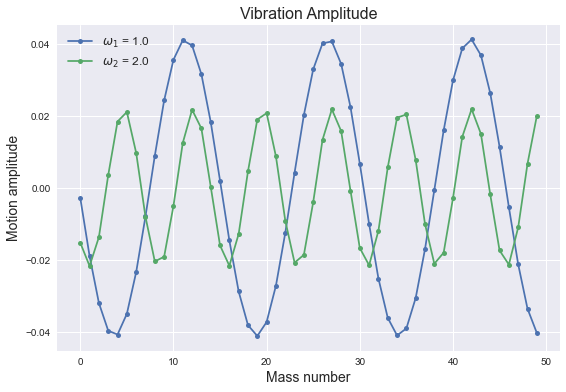

In [83]:
N = 50
m_default = 1.0
k_default = 6.0
C_default = 0.1
N_default = 50

omega1 = 1.0
omega2 = 2.0


def motion_amplitude(omega: float, k: float = k_default, m: float = m_default, N: int = N_default, C: float = C_default) -> npt.ArrayLike:
    alpha = 2 * k - m * omega * omega
    # This loop runs from  0 to N-1.
    # Notice how it fills A:
    # 1. on the diagonal first, 
    # 2. then the column one to the right,
    # 3. the the row right beneat the diagonal.
    A = np.zeros((N, N), dtype=float)
    for i in range(N - 1):
        A[i, i] = alpha
        A[i, i + 1] = -k
        A[i + 1, i] = -k
    # 1. Element A[0,0] is wrong after the loop. Replace with the correct value.
    # 2. Element A[N-1,N-1] has not yet been filled,
    A[0, 0] = alpha - k
    A[N - 1, N - 1] = alpha - k
    # It is maybe worth repeating here that a 1D array is already a vertical array.
    b = np.zeros(N, dtype=float)
    b[0] = C
    
    print(f"A:\n{A}")
    print(f"b:\n{b}")
    
    # Solve for amplitudes a (data array x)
    x = spl.solve(A, b)
    return x

x1 = motion_amplitude(omega1)
x2 = motion_amplitude(omega2)

plt.figure(figsize=[9, 6])
plt.title("Vibration Amplitude", fontsize=16)
plt.plot(x1,".-", markersize=10, label=f"$\omega_1$ = {omega1}")
plt.plot(x2,".-", markersize=10, label=f'$\omega_2$ = {omega2}')
plt.legend(fontsize=12)
plt.xlabel("Mass number", fontsize=14)
plt.ylabel("Motion amplitude", fontsize=14)
plt.show()
plt.close()

## Answer
We see that for a smaller frequency, not only does the frequency decrease, but the amplitude of the motion is also increased!

#### Excercise 6

Use `scipy.linalg.solve_banded` to solve the mass spring problem again. You will have to study how the array used for this function *along each row only stores each diagonal band*. Since there are three bands, the array `ab` will need to be $(3,N)$.

- Print the banded-matrix array `ab`, and compare with the lecture example.
- Plot the displacement amplitudes, and compare with the previous result from above.

<font color="blue">**ANSWER:**  </font>

A_1:
[[ 5. -6.  0. ...  0.  0.  0.]
 [-6. 11. -6. ...  0.  0.  0.]
 [ 0. -6. 11. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 11. -6.  0.]
 [ 0.  0.  0. ... -6. 11. -6.]
 [ 0.  0.  0. ...  0. -6.  5.]]
b_1:
[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
A_1_banded:
[[ 0. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.]
 [ 5. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
  11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
  11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.  5.]
 [-6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. 

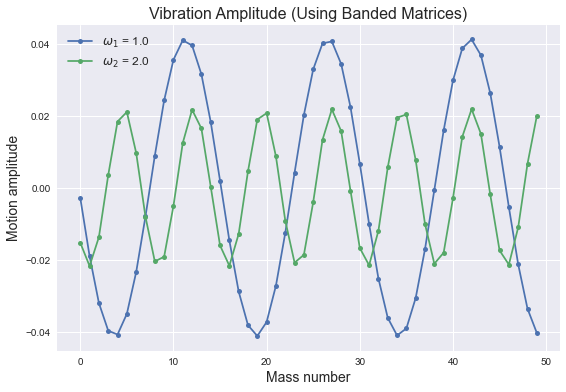

In [84]:
m_default = 1.0
k_default = 6.0
C_default = 0.1
N_default = 50

omega1 = 1.0
omega2 = 2.0

def construct_A_b(omega: float, k: float = k_default, m: float = m_default, N: int = N_default, C: float = C_default) -> Tuple[npt.ArrayLike, npt.ArrayLike]:
    """Constructs matrix A from given parameters

    Args:
        omega (float): Frequency
        k (float, optional): Defaults to k_default.
        m (float, optional): Defaults to m_default.
        N (int, optional): Defaults to N_default.
        C (float, optional): Defaults to C_default.

    Returns:
        Tuple[npt.ArrayLike, npt.ArrayLike]: Returns matrix A
    """
    alpha = 2 * k - m * omega * omega
    
    A = np.zeros((N, N), dtype=float)
    for i in range(N - 1):
        A[i, i] = alpha
        A[i, i + 1] = -k
        A[i + 1, i] = -k

    A[0, 0] = alpha - k
    A[N - 1, N - 1] = alpha - k
    
    b = np.zeros(N, dtype=float)
    b[0] = C
    
    return A, b

# Note: The method here of first constructing A and then 
# turning A into a banded matrix is not efficient. 
# We should compute A directly as a banded matrix.
# I opted for this method as a test of skillrather than 
# trying to save memory.
def construct_banded(l_and_u: Tuple[int, int], A: npt.ArrayLike) -> npt.ArrayLike:
    """Turns an array (A) into  banded form. Requires specification of the number of
    upper and lower bands.

    Args:
        l_and_u (Tuple[int, int]): Number of lower and upper bands, input as a tuple (lower, upper)
        A (npt.ArrayLike): The matrix to be returned as a banded matrix.

    Returns:
        npt.ArrayLike: The banded representation of the matrix A
    """
    lower, upper = l_and_u
    n = A.shape[0]
    A_banded = np.zeros((lower + 1 + upper, n), dtype=float)
    for i in range(upper, 0, -1):
        for j in range(n - i):
            A_banded[upper - i, j + i] = A[j, j + i]
            
    for i in range(lower, 0, -1):
        for j in range(n - i):
            A_banded[upper + i, j] = A[i + j, j]
            
    for i in range(N):
        A_banded[upper, i] = A[i, i]
        
    return A_banded

lower_upper = (1, 1)

A_1, b_1 = construct_A_b(omega1)
A_2, b_2 = construct_A_b(omega2)

A_1_banded = construct_banded(lower_upper, A_1)
A_2_banded = construct_banded(lower_upper, A_2)

print(f"A_1:\n{A_1}")
print(f"b_1:\n{b_1}")
print(f"A_1_banded:\n{A_1_banded}")

print(f"A_2:\n{A_2}")
print(f"b_2:\n{b_2}")
print(f"A_2_banded:\n{A_2_banded}")

x1 = spl.solve_banded(lower_upper, A_1_banded, b_1)
x2 = spl.solve_banded(lower_upper, A_2_banded, b_1)

plt.figure(figsize=[9, 6])
plt.title("Vibration Amplitude (Using Banded Matrices)", fontsize=16)
plt.plot(x1,".-", markersize=10, label=f"$\omega_1$ = {omega1}")
plt.plot(x2,".-", markersize=10, label=f'$\omega_2$ = {omega2}')
plt.legend(fontsize=12)
plt.xlabel("Mass number", fontsize=14)
plt.ylabel("Motion amplitude", fontsize=14)
plt.show()
plt.close()


## Answer

The plot is identical to the previous plot, except here we have used a banded matrix to reduce memory usage.

Compared to the lecture example, we can see the banded matrix is much smaller, and has only $3 * N$ (for the case where the banded matrix has 1 upper and 1 lower 'band') elements instead of $N * N$ elements.